# Customer Churn Analysis

This project analyzes customer churn data to uncover trends, patterns, and key insights that can help reduce churn and improve customer retention strategies. We use Python for data cleaning, analysis, and visualization.

In [4]:
import pandas as pd

df = pd.read_csv(r"C:\Users\smith\OneDrive\Desktop\WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
df.drop(columns=['customerID'], inplace=True)

Text(0.5, 1.0, 'Churn Distribution')

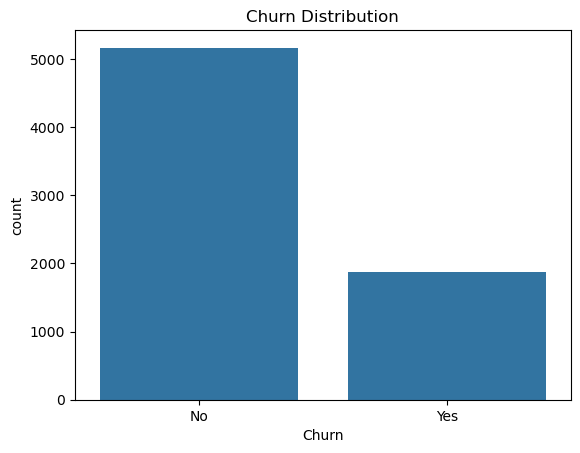

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Churn distribution
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")

<Axes: xlabel='Contract', ylabel='count'>

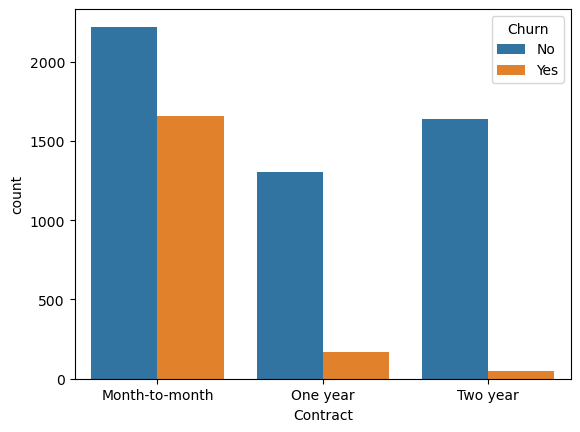

In [10]:
sns.countplot(x='Contract', hue='Churn', data=df)

In [12]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

In [14]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.77      0.79      0.78      1407



<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

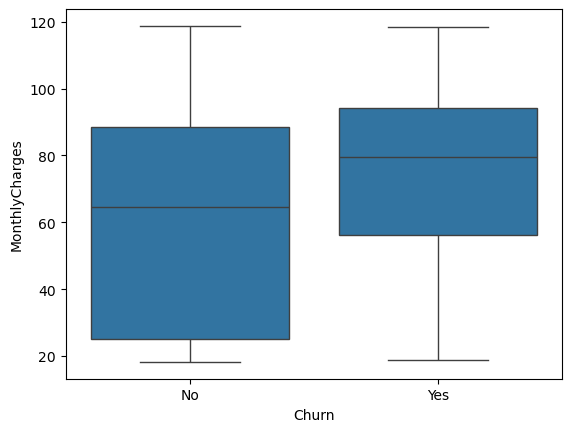

In [24]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

In [26]:
coeff_df = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Coefficient'])
coeff_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
MonthlyCharges,0.703291
TotalCharges,0.663135
InternetService,0.189142
PaperlessBilling,0.147641
SeniorCitizen,0.103191
MultipleLines,0.056968
PaymentMethod,0.045165
Partner,0.032594
StreamingMovies,0.015859
StreamingTV,0.011702
